# Rye Microgrid Dataset Analysis (Useful)

This notebook contains code for analysis of the Rye Microgrid,  small microgrid placed at Langørgen, in the outskirts of Trondheim, Norway.

Environment of Use:
1. Data is supplied to a modern farm and three households
2. Distributed Energy Resources- A Wind Turbine and a Rack of PV Panels
3. The system has two storages– a battery with high charge and discharge response, but with limited storage and losses, and a hydrogen energy system, with lower charge and discharge rates, higher losses and storage capacity.

This dataset was used for the Tronderenergi AI Hackathon Challenge in 2021.
https://github.com/AneoGroup/tronderenergi-ai-hackathon-2021

The above link contains more details on the specifics of the systems.


In [9]:
# Importing a few libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv') #Import the data

In [3]:
train_data #Look at the df

,time,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,...,t_50m:C,relative_humidity_50m:p,dew_point_50m:C,wind_speed_50m:ms,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d
0,2020-01-01 13:00:00,0.0,40.59,26.514689,0.28969,0.0,0.0,1.0,10.0,64826.0,...,8.4,60.7,1.3,8.4,246.3,8.3,60.3,1.0,10.4,247.3
1,2020-01-01 14:00:00,0.0,67.86,28.326960,0.29561,0.0,0.0,1.0,0.0,8961.1,...,8.4,61.6,1.5,8.0,252.3,8.4,60.7,1.2,10.0,252.1
2,2020-01-01 15:00:00,0.0,116.68,23.682207,0.30044,0.0,0.0,1.0,0.0,0.0,...,8.5,60.3,1.3,9.6,254.1,8.4,59.6,1.0,11.7,253.8
3,2020-01-01 16:00:00,0.0,120.22,25.354782,0.29975,0.0,0.0,1.0,0.0,0.0,...,8.4,63.9,2.0,12.1,254.6,8.3,63.4,1.7,14.3,254.2
4,2020-01-01 17:00:00,0.0,109.86,23.861942,0.29650,0.0,0.0,1.0,0.0,0.0,...,7.2,78.9,3.8,11.7,249.5,7.1,77.9,3.5,13.9,249.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,2021-01-31 19:00:00,0.0,21.98,44.422658,0.60243,0.0,0.0,1.0,0.0,0.0,...,-3.2,93.1,-4.2,4.8,231.2,-3.1,91.6,-4.3,6.0,238.3
9511,2021-01-31 20:00:00,0.0,9.60,45.167707,0.53335,0.0,0.0,1.0,0.0,0.0,...,-3.5,94.1,-4.3,4.9,224.9,-3.3,92.1,-4.4,6.2,231.8
9512,2021-01-31 21:00:00,0.0,22.61,32.476198,0.51195,0.0,0.0,1.0,0.0,0.0,...,-3.6,93.0,-4.6,4.7,224.5,-3.3,90.6,-4.6,6.0,231.7
9513,2021-01-31 22:00:00,0.0,21.70,28.561791,0.47122,0.0,0.0,1.0,0.0,0.0,...,-3.7,92.1,-4.8,4.5,222.8,-3.4,89.5,-4.9,5.8,231.1


Dataset contains a full year's data with timestamps of 1 hour.

In [7]:
train_data.columns

Index(['time', 'pv_production', 'wind_production', 'consumption',
       'spot_market_price', 'precip_1h:mm', 'precip_type:idx',
       'prob_precip_1h:p', 'clear_sky_rad:W', 'clear_sky_energy_1h:J',
       'diffuse_rad:W', 'diffuse_rad_1h:Wh', 'direct_rad:W',
       'direct_rad_1h:Wh', 'global_rad:W', 'global_rad_1h:Wh',
       'sunshine_duration_1h:min', 'sun_azimuth:d', 'sun_elevation:d',
       'low_cloud_cover:p', 'medium_cloud_cover:p', 'high_cloud_cover:p',
       'total_cloud_cover:p', 'effective_cloud_cover:p', 'temp',
       'relative_humidity_2m:p', 'dew_point_2m:C', 'wind_speed_2m:ms',
       'wind_dir_2m:d', 't_10m:C', 'relative_humidity_10m:p',
       'dew_point_10m:C', 'wind_speed_10m:ms', 'wind_dir_10m:d', 't_50m:C',
       'relative_humidity_50m:p', 'dew_point_50m:C', 'wind_speed_50m:ms',
       'wind_dir_50m:d', 't_100m:C', 'relative_humidity_100m:p',
       'dew_point_100m:C', 'wind_speed_100m:ms', 'wind_dir_100m:d'],
      dtype='object')

Variables include:
Time, PV Production, Wind Production, Consumption, Spot Market Price and various Weather parameters such as Radiation, Relative Humidity, Wind Direction, etc.

In [5]:
train_data.describe()

,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,diffuse_rad:W,...,t_50m:C,relative_humidity_50m:p,dew_point_50m:C,wind_speed_50m:ms,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9.515000e+03,9515.000000,...,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.00000,9515.000000
mean,7.654312,21.254382,20.262091,0.127386,0.066322,0.039096,3.312181,144.807325,5.213013e+05,38.549511,...,5.729207,76.279443,1.591088,4.283847,195.021703,5.633558,74.844782,1.220410,5.11671,198.633568
std,15.673519,38.225468,8.311275,0.125292,0.353434,0.239879,10.585675,232.985222,8.366789e+05,59.636149,...,6.927206,13.792720,6.265550,2.241726,81.361187,6.836455,14.001831,6.255477,2.67242,81.089361
min,0.000000,-582.200000,0.048396,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,...,-14.800000,23.400000,-16.300000,0.100000,0.100000,-14.600000,22.300000,-16.600000,0.10000,0.300000
25%,0.000000,-0.260000,14.757704,0.044375,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,...,1.200000,67.400000,-2.700000,2.500000,134.100000,1.000000,65.900000,-3.100000,3.00000,142.950000
50%,0.000000,2.370000,18.817098,0.090390,0.000000,0.000000,1.000000,0.000000,3.637200e+03,0.000000,...,4.600000,78.400000,1.200000,4.000000,190.400000,4.500000,76.800000,0.900000,4.90000,192.300000
75%,6.411375,26.040000,23.716080,0.165970,0.000000,0.000000,1.000000,220.800000,7.768631e+05,63.900000,...,10.200000,87.100000,6.400000,5.600000,265.500000,10.100000,85.700000,6.000000,6.70000,267.700000
max,79.855834,225.500000,70.366622,1.140590,6.220000,3.000000,95.000000,834.800000,3.004661e+06,320.200000,...,29.700000,100.000000,17.000000,15.300000,359.900000,29.600000,100.000000,16.500000,17.40000,359.700000


At first glance, this resembles a small microgrid energy system given that PV, Wind and Consumption are not at large scale values. Interestingly, it seems that this particular region has high wind production (max is 225). Also wind production has negative values which might mean that in certain days the turbine consumes more energy than it produces.

In [8]:
train_data.isna().sum()

,0
time,0
pv_production,0
wind_production,0
consumption,0
spot_market_price,0
precip_1h:mm,0
precip_type:idx,0
prob_precip_1h:p,0
clear_sky_rad:W,0
clear_sky_energy_1h:J,0


The dataset is clean and doesn't contain any NaN values.

In [17]:
jan_data = train_data[:731] # Data for January
jan_data

,time,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,...,t_50m:C,relative_humidity_50m:p,dew_point_50m:C,wind_speed_50m:ms,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d
0,2020-01-01 13:00:00,0.0,40.59,26.514689,0.28969,0.0,0.0,1.0,10.0,64826.0,...,8.4,60.7,1.3,8.4,246.3,8.3,60.3,1.0,10.4,247.3
1,2020-01-01 14:00:00,0.0,67.86,28.326960,0.29561,0.0,0.0,1.0,0.0,8961.1,...,8.4,61.6,1.5,8.0,252.3,8.4,60.7,1.2,10.0,252.1
2,2020-01-01 15:00:00,0.0,116.68,23.682207,0.30044,0.0,0.0,1.0,0.0,0.0,...,8.5,60.3,1.3,9.6,254.1,8.4,59.6,1.0,11.7,253.8
3,2020-01-01 16:00:00,0.0,120.22,25.354782,0.29975,0.0,0.0,1.0,0.0,0.0,...,8.4,63.9,2.0,12.1,254.6,8.3,63.4,1.7,14.3,254.2
4,2020-01-01 17:00:00,0.0,109.86,23.861942,0.29650,0.0,0.0,1.0,0.0,0.0,...,7.2,78.9,3.8,11.7,249.5,7.1,77.9,3.5,13.9,249.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2020-01-31 19:00:00,0.0,13.13,35.127247,0.19396,0.0,0.0,1.0,0.0,0.0,...,2.2,65.2,-3.6,5.2,180.7,2.2,62.4,-4.3,7.0,186.1
727,2020-01-31 20:00:00,0.0,-0.28,20.843544,0.19010,0.0,0.0,1.0,0.0,0.0,...,1.9,68.7,-3.3,4.7,177.8,1.9,66.0,-3.8,6.2,186.1
728,2020-01-31 21:00:00,0.0,-0.29,21.891533,0.18593,0.0,0.0,1.0,0.0,0.0,...,1.8,70.4,-3.0,4.4,185.9,1.9,67.5,-3.5,6.0,193.7
729,2020-01-31 22:00:00,0.0,-0.29,20.906838,0.17364,0.0,0.0,1.0,0.0,0.0,...,1.7,71.7,-2.8,4.0,177.8,1.8,68.4,-3.4,5.6,182.3


In [36]:
def plot():
  # Time Series for Energy Production, Consumption for January
  plt.figure(figsize=(12, 10))
  plt.plot(jan_data.index, jan_data["pv_production"], label="PV Production", color="orange")
  plt.plot(jan_data.index, jan_data["wind_production"], label="Wind Production", color="blue")
  plt.plot(jan_data.index, jan_data["consumption"], label="Consumption Load", color="green")
  plt.xlabel("Time (only January)")
  plt.legend()
  plt.show()

  # Correlation Heatmap
  data = train_data.drop(columns=['time'])
  sns.set_style("whitegrid")
  plt.figure(figsize=(12, 10))
  sns.heatmap(data.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
  plt.title("Correlation Heatmap")
  plt.show()

  # Histograms for Key Weather Variables
  features = ['precip_1h:mm', 'precip_type:idx',
       'prob_precip_1h:p', 'clear_sky_rad:W', 'clear_sky_energy_1h:J',
       'diffuse_rad:W', 'diffuse_rad_1h:Wh', 'direct_rad:W',
       'direct_rad_1h:Wh', 'global_rad:W', 'global_rad_1h:Wh',
       'sunshine_duration_1h:min', 'sun_azimuth:d', 'sun_elevation:d',
       'low_cloud_cover:p', 'medium_cloud_cover:p', 'high_cloud_cover:p',
       'total_cloud_cover:p', 'effective_cloud_cover:p', 'temp',
       'relative_humidity_2m:p', 'dew_point_2m:C', 'wind_speed_2m:ms',
       'wind_dir_2m:d', 't_10m:C', 'relative_humidity_10m:p',
       'dew_point_10m:C', 'wind_speed_10m:ms', 'wind_dir_10m:d', 't_50m:C',
       'relative_humidity_50m:p', 'dew_point_50m:C', 'wind_speed_50m:ms',
       'wind_dir_50m:d', 't_100m:C', 'relative_humidity_100m:p',
       'dew_point_100m:C', 'wind_speed_100m:ms', 'wind_dir_100m:d']
  axes = train_data[features].hist(bins=30, figsize=(12, 10), color="blue", edgecolor="black")
  for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=10)  # Set smaller font size
  plt.suptitle("Distributions of Weather Data")
  plt.show()

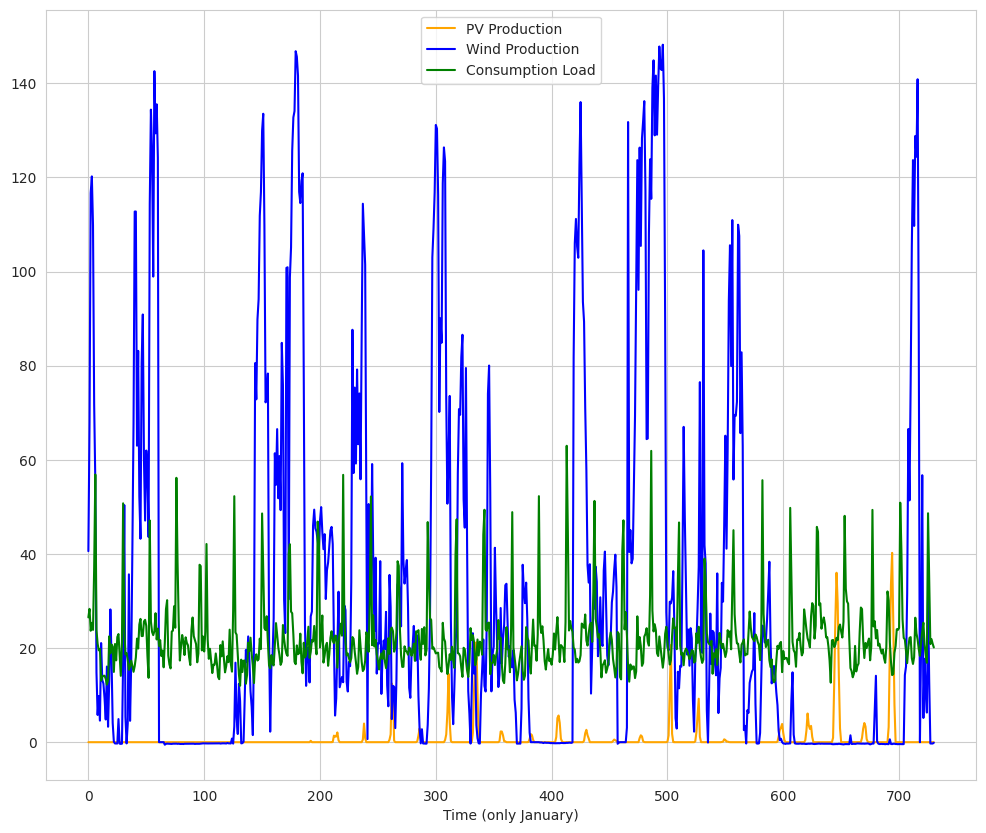

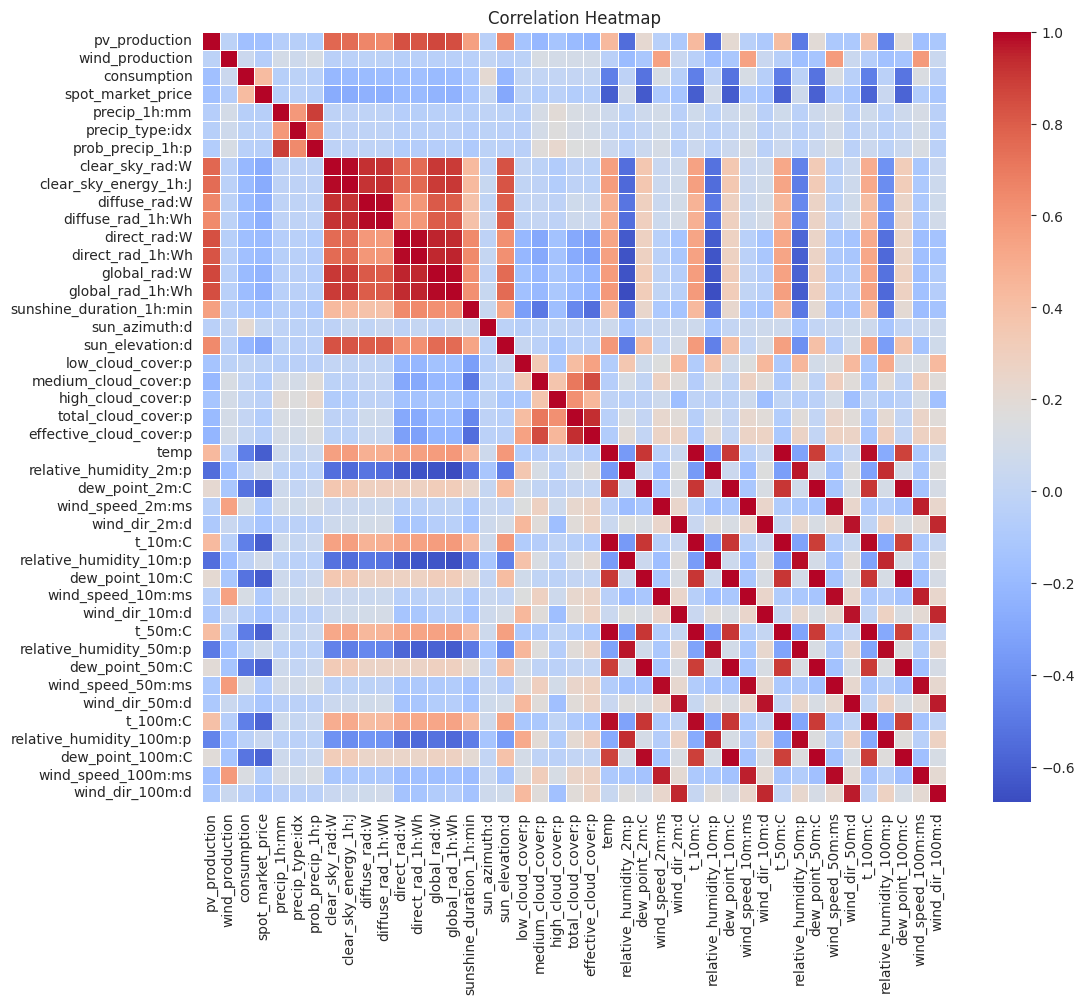

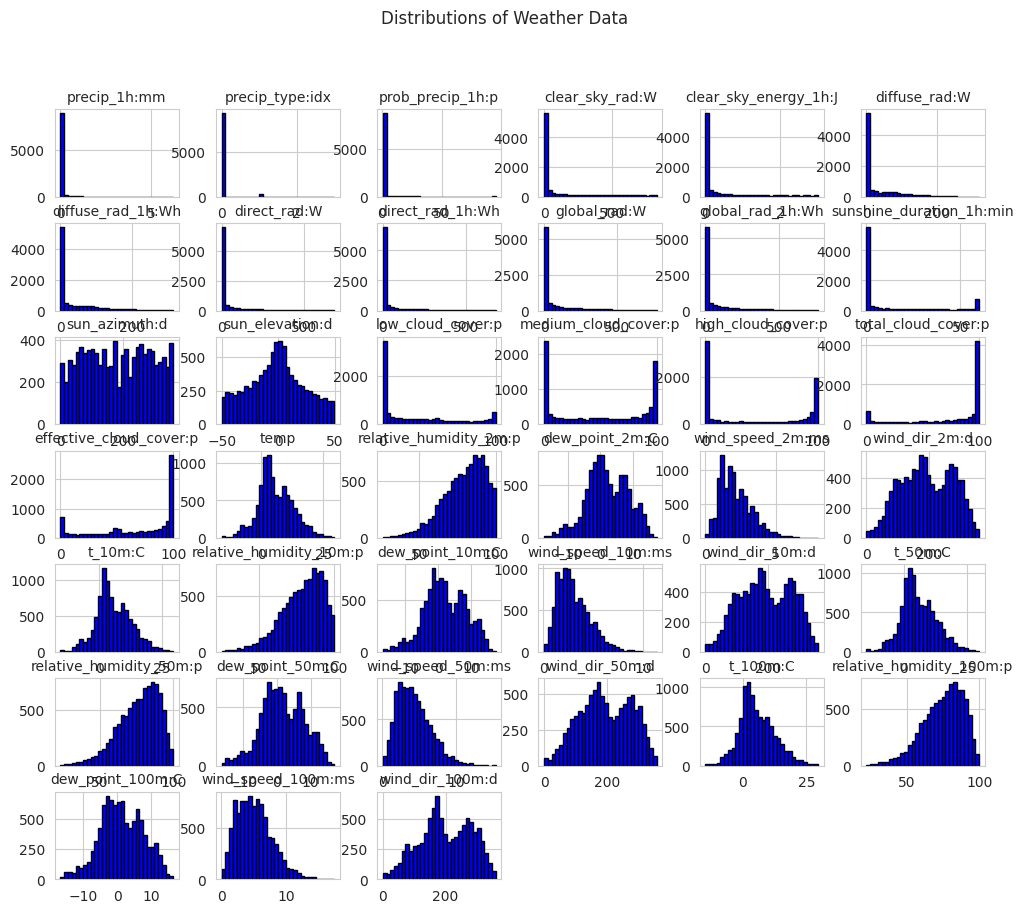

In [37]:
plot()

Dataset also contains a test set which may be useful for testing purposes.

In [38]:
test_data = pd.read_csv("test.csv")
test_data

,time,pv_production,wind_production,consumption,spot_market_price,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,...,t_50m:C,relative_humidity_50m:p,dew_point_50m:C,wind_speed_50m:ms,wind_dir_50m:d,t_100m:C,relative_humidity_100m:p,dew_point_100m:C,wind_speed_100m:ms,wind_dir_100m:d
0,2021-02-01 00:00:00,0.0,29.02,37.731253,0.42572,0.0,0.0,1.0,0.0,0.0,...,-4.3,91.9,-5.4,4.0,213.8,-3.7,88.8,-5.3,5.1,223.2
1,2021-02-01 01:00:00,0.0,27.09,39.288933,0.42531,0.0,0.0,1.0,0.0,0.0,...,-4.6,91.5,-5.8,4.0,205.6,-4.0,87.8,-5.7,5.1,214.8
2,2021-02-01 02:00:00,0.0,40.56,37.472487,0.41575,0.0,0.0,1.0,0.0,0.0,...,-4.9,91.2,-6.1,4.3,203.8,-4.1,86.9,-5.9,5.6,212.1
3,2021-02-01 03:00:00,0.0,37.72,37.343327,0.42344,0.0,0.0,1.0,0.0,0.0,...,-5.2,89.9,-6.6,4.3,201.7,-4.3,85.0,-6.4,5.6,210.4
4,2021-02-01 04:00:00,0.0,47.98,38.386463,0.50187,0.0,0.0,1.0,0.0,0.0,...,-5.6,88.3,-7.2,4.0,194.6,-4.5,82.4,-7.0,5.0,201.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2021-03-07 20:00:00,0.0,-0.36,45.174683,0.28008,0.0,0.0,1.0,0.0,0.0,...,-1.2,86.0,-3.2,4.5,268.9,-1.5,86.1,-3.5,5.4,274.8
837,2021-03-07 21:00:00,0.0,4.20,42.956577,0.28772,0.0,0.0,1.0,0.0,0.0,...,-1.4,86.5,-3.4,4.1,260.6,-1.7,86.1,-3.7,5.0,266.6
838,2021-03-07 22:00:00,0.0,13.24,33.505287,0.28761,0.0,0.0,1.0,0.0,0.0,...,-1.9,86.5,-3.8,3.8,252.3,-2.1,85.5,-4.2,4.7,258.2
839,2021-03-07 23:00:00,0.0,23.88,30.679047,0.27743,0.0,0.0,1.0,0.0,0.0,...,-2.5,88.4,-4.1,3.7,236.9,-2.7,87.1,-4.5,4.7,244.9


Overall points from data:

1. Dataset is clean (no nan or mismatched values)
2. Contains a lot of data- Over a year's worth of data at 1h timestamp
3. All necessary variables included- PV, Wind, Battery (ESS), DER, Load, Price, Weather, etc.
4. Less in-depth and comprehensive compared to the Mesa Del Sol Microgrid and will make a good starter dataset for simpler simulations
5. Contains a test set for evaluation